In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
class ImageAnalyser:
    def __init__(self, path_to_img=None, img=None):
        if path_to_img is not None:
            self.path_to_img = path_to_img
            self.colored_img = self.read()
            # needed as opencv read image in BGR format
            self.convert_from_bgr_to_rgb()
            self.gray_img = self.convert_img_to_gray().astype(np.uint8)
        elif img is not None:
            if len(img.shape) == 3:
                self.colored_img = img
                self.gray_img = self.convert_img_to_gray().astype(np.uint8)
            else:
                self.colored_img = None
                self.gray_img = img
        else:
            raise Exception("Cannot create image analyser without image and path to read image")

    # read image by path
    def read(self) -> np.ndarray:
        return cv2.imread(self.path_to_img)
    
    def convert_from_bgr_to_rgb(self):
        b, g, r = self.colored_img[:, :, 0], self.colored_img[:, :, 1], self.colored_img[:, :, 2]
        
        rgb_img = np.zeros_like(self.colored_img)
        rgb_img[:, :, 0] = r
        rgb_img[:, :, 1] = g
        rgb_img[:, :, 2] = b
        
        self.colored_img = rgb_img
        
    def convert_from_rgb_to_bgr(self):
        r, g, b = self.colored_img[:, :, 0], self.colored_img[:, :, 1], self.colored_img[:, :, 2]
        
        bgr_img = np.zeros_like(self.colored_img)
        bgr_img[:, :, 0] = b
        bgr_img[:, :, 1] = g
        bgr_img[:, :, 2] = r
        
        return bgr_img
        
    # converts image to grayscale
    def convert_img_to_gray(self) -> np.ndarray:
        r, g, b = self.colored_img[:, :, 0], self.colored_img[:, :, 1], self.colored_img[:, :, 2]
        gray_img = 0.2989 * r + 0.5870 * g + 0.1140 * b
        return gray_img
    
    def add_salt_and_pepper_noise(self):
        noisy_img = self.gray_img.copy()
        
        a = 0.05
        b = 0.05
        
        random_nums = np.random.uniform(size=(self.gray_img.shape))
                
        a_indexes = np.where(random_nums <= a)
        
        u = a + b
        
        u_indexes = np.where((random_nums <= u) & (random_nums > a))
        
        noisy_img[a_indexes[0], a_indexes[1]] = 0
        noisy_img[u_indexes[0], u_indexes[1]] = 255
        
        return noisy_img
    
    def erode(self, structural_element):
        
        out = self.gray_img.copy()
                
        w = structural_element.shape[0] // 2
        h = structural_element.shape[1] // 2
                
        for i in range(w, out.shape[0] - w):
            for j in range(h, out.shape[1] - h):
                window = self.gray_img[i-w:i+w+1, j-h: j+h+1]
                window_elems = window[structural_element]
                out[i][j] = np.min(window_elems)
        
        return out
    
    def dialate(self, structural_element):
        
        out = self.gray_img.copy()
                
        w = structural_element.shape[0] // 2
        h = structural_element.shape[1] // 2
                
        for i in range(w, out.shape[0] - w):
            for j in range(h, out.shape[1] - h):
                window = self.gray_img[i-w:i+w+1, j-h: j+h+1]
                window_elems = window[structural_element]
                out[i][j] = np.max(window_elems)
        
        return out
    
    def opening(self, structural_element):
        erosing_img = self.erode(structural_element)
        return self.dialate(structural_element)
    
    def closing(self, structural_element):
        dialate_img = self.erode(structural_element)
        return self.erode(structural_element)
    
image_analyser = ImageAnalyser(f"/home/julia/Downloads/Telegram Desktop/DIP/lab 5/2.png")

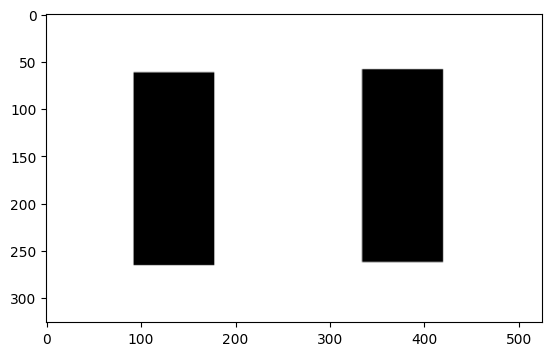

In [3]:
plt.imshow(image_analyser.gray_img, "gray")

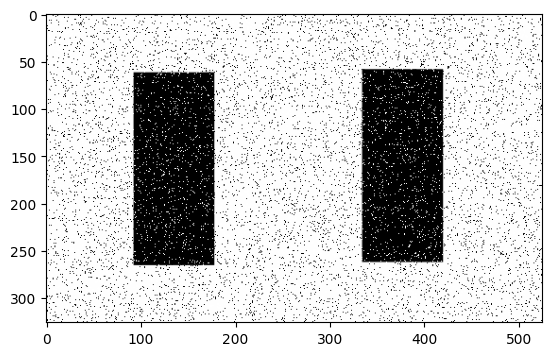

In [4]:
noisy_img = image_analyser.add_salt_and_pepper_noise()

plt.imshow(noisy_img, "gray")

image_analyser_with_noise = ImageAnalyser(img=noisy_img)

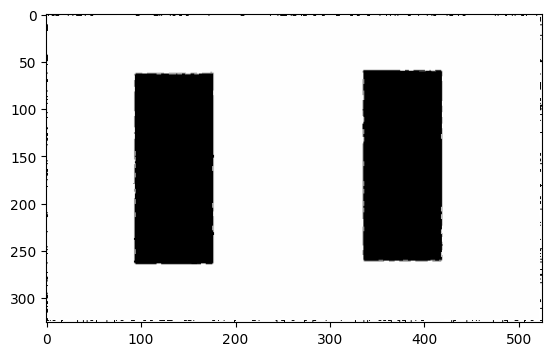

In [5]:
plus = np.array([[False,True,False],[True,True,True],[False,True,False]])
rect = np.ones((5,5), dtype=bool)
pixel = np.zeros((3, 3))
pixel[1, 1] = 1

errosian_img = image_analyser_with_noise.erode(plus)
errosian_img = ImageAnalyser(img=errosian_img).dialate(rect)

plt.imshow(errosian_img, "gray")

Check that it correlate with opencv version

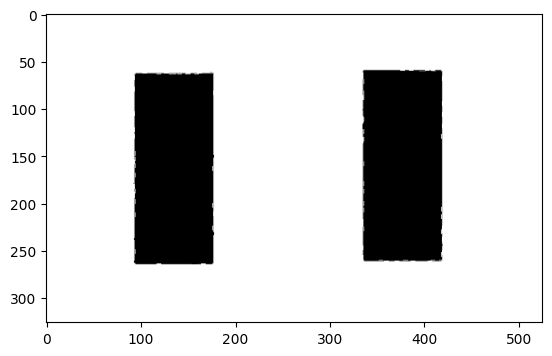

In [6]:
cvdial = cv2.erode(image_analyser_with_noise.gray_img, plus.astype(np.uint8))
cvdial = cv2.dilate(cvdial, rect.astype(np.uint8))

plt.imshow(cvdial, "gray")